# Matploylib Homework

### Lynne A. Freilich 04/15/2022

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

### Get and merge .csv files into one data set

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data for preview
Study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### There were 249 unique mice in the study 

In [3]:
# Checking the number of mice.
mice = len(pd.unique(Study['Mouse ID']))   
print(f'The total number of mice who unwillinginly participated in the study is: {mice}')

The total number of mice who unwillinginly participated in the study is: 249


### Find and display all duplicate mice entries

In [4]:
# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_mice = Study[Study[['Mouse ID', 'Timepoint']].duplicated() == True]  
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_mice 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


### Additional look at duplicates for mouse g898 to determine which occurrence of entries to keep 
#### Both sets of entries for mouse g989 have complete data and there is no way to determine from the data alone which set of statistical data is correct. Will keep first occurrence of duplicate timepoints.


In [5]:
# look at entire set of duplicate mice 
Mouse_g989 = Study.loc[(Study['Mouse ID'] == 'g989')]
Mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


### Remove duplicate mice from the Study results 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Study_clean = Study.drop_duplicates(subset = ['Mouse ID','Timepoint'], keep= 'first')

# Checking the number of mice in the clean DataFrame.
Study_clean['Mouse ID'].count()

1888

## Summary Statistics

### Retrieve summary statistics using Groupby summary Functions and creating a Summary DataFrame

In [7]:
# Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Grab a clean copy of the data to avoid conflicts 
SC = Study_clean.copy()

# Set up my data 
Summary = pd.DataFrame(SC.groupby(['Drug Regimen']))
Summary.rename(columns={Summary.columns[0]:'Drug Regimen'}, inplace=True)
Summary.set_index=('Drug Regimen')

# Gather some stats 
Tumor_mean = SC.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Tumor_med = SC.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Tumor_var = SC.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Tumor_sdev = SC.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Tumor_sem = SC.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Results_Frame = {'Tumor Volume Mean':Tumor_mean,
                 'Tumor Volume Median':Tumor_med,
                 'Tumor Volume Variance':Tumor_var,
                 'Tumor Volume Standard Deviation':Tumor_sdev,
                 'Tumor Volume Standard Error':Tumor_sem}
                 

Regimen_Summary = pd.DataFrame(Results_Frame, index=Summary['Drug Regimen'])
Regimen_Summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Summary Analysis
#### From the summary information we are able to identify that some Drug Regimens were much more effective at reducing tumor size than others. 
#### Two Drug Regimens in particular show tumor reduction rates 20% better than the other regimens tested. Capomulin with a tumor volume mean of 40.6 and Ramicane with a tumor volume mean of 40.2. 

### Summarize our study results using groupby and .agg Function  (shown Below)

In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
# Variable to hold new Column Names
NewNames = {'mean':'Tumor Volume Mean',
            'median':'Tumor Volume Median',
            'var':'Tumor Volume Variance',
            'std':'Tumor Volume Standard Deviation',
            'sem':'Tumor Volume Standard Error'}
# Variable to hold new Column Values
Aggregates = ['mean', 'median', 'var', 'std', 'sem']

Regimen_Summary1 = pd.DataFrame(SC.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Aggregates).rename(columns=NewNames))
Regimen_Summary1

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

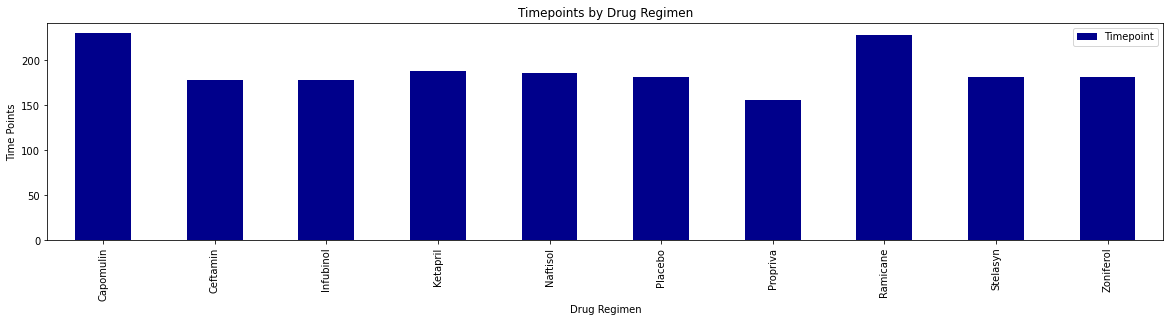

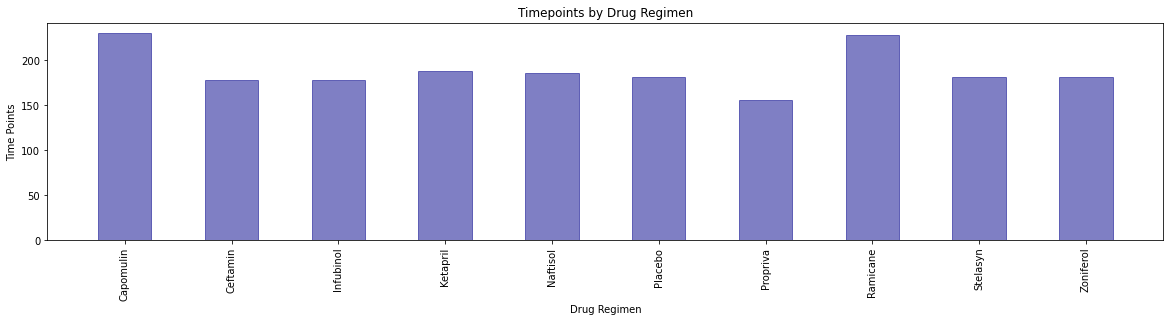

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Grab a clean copy of the data to avoid conflicts 
SC = Study_clean.copy()

# Get total number of timepoints for each Regimen
Mice_Points = pd.DataFrame(SC.groupby('Drug Regimen')['Timepoint'].count())

# plot the total timepoints 
Mice_Points.plot(xlabel="Drug Regimen", ylabel="Time Points", kind="bar", figsize=(20,4), color='darkblue')
plt.title('Timepoints by Drug Regimen')

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Mice_Points = Mice_Points.reset_index()

# Set x axis and tick locations
x_axis = np.arange(len(Mice_Points['Timepoint']))
tick_locations = [value for value in x_axis]

# Set Figure size and axis data                          
plt.figure(figsize=(20,4))
plt.bar(x_axis, Mice_Points['Timepoint'], width=.5, color='darkblue', alpha=0.5, align="center", edgecolor='darkblue')
plt.xticks(tick_locations, Mice_Points['Drug Regimen'], rotation="vertical")

# Add Labels for display
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")
plt.title('Timepoints by Drug Regimen')
plt.show()

## Bar Chart Analysis
#### The two bar charts displayed above give us some additional insight to our study data. The two drug regimens that we identified earlier as showing the most promise from our summary information also have more timepoints than the other regimens studied. This may indicate that these mice continued to be treated for a longer period of time than the mice on less effective regimens, or that more mice were treated with these regimens than the others in the study. 

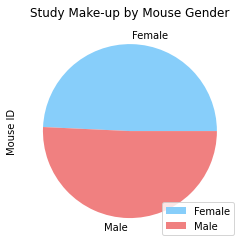

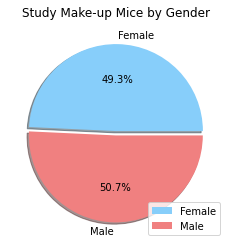

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Grab a clean copy of the data to avoid conflicts 
SC = Study_clean.copy()
colors = ['Lightskyblue', 'lightcoral']

# Get number of males and females 
MVF_Points = pd.DataFrame(SC.groupby('Sex')['Mouse ID'].count())

# Build plot 
MVF_Points.plot.pie(subplots=True, label='Sex', figsize=(20,4), colors=colors)

# Add Title 
plt.legend(loc='lower right')
plt.title('Study Make-up by Mouse Gender')
plt.show()

# Generate a pie plot showing the distribution of female versus male mice using pyplot
MVF_Points = MVF_Points.reset_index()

# Set x axis and tick locations
x_axis = np.arange(len(MVF_Points['Sex']))
explode = (0, 0.05)

# Build plot 
plt.pie(MVF_Points['Mouse ID'],labels =MVF_Points['Sex'],
        explode = explode, autopct='%1.1f%%',
        colors=colors, shadow=True, startangle=0)
plt.legend(loc='upper right')

# Clean up for display
plt.legend(loc='lower right')
plt.title('Study Make-up Mice by Gender')
plt.show()

## Pie Chart Analysis
#### Both of the above pie charts demonstrate that there was an even distribution of male and female mice in the study overall. The marginal difference between male and female is not likely to be statistically significant. To insure there was uniform distribution throughout the study distribution within each drug regimen should also be evaluated.

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Grab a clean copy of the data to avoid conflicts 
SC = Study_clean.copy()

# Collect the Regimens we want
Select_Reg = SC.loc[(SC['Drug Regimen'] == 'Capomulin')|
                    (SC['Drug Regimen'] == 'Ramicane')|
                    (SC['Drug Regimen'] == 'Infubinol')|
                    (SC['Drug Regimen'] == 'Ceftamin')]

Select_box = pd.DataFrame(Select_Reg)
                          
# Start by getting the last (greatest) timepoint for each mouse
Select_Reg = pd.DataFrame(Select_Reg.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Select_Reg_merge = Select_Reg.merge(SC, on=['Drug Regimen','Mouse ID','Timepoint'])
Select_Reg_merge

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2
1,Capomulin,b742,45,Male,7,21,38.939633,0
2,Capomulin,f966,20,Male,16,17,30.485985,0
3,Capomulin,g288,45,Male,3,19,37.074024,1
4,Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,Male,1,17,30.276232,0
96,Ramicane,u196,45,Male,18,25,40.667713,3
97,Ramicane,w678,5,Female,5,24,43.166373,0
98,Ramicane,y449,15,Male,19,24,44.183451,0


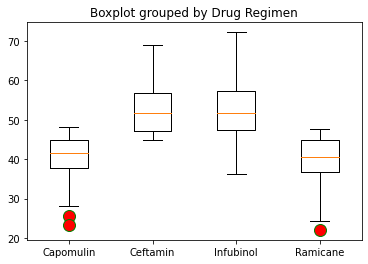

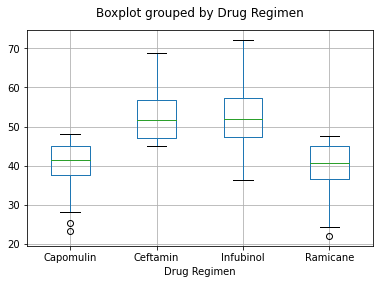

In [12]:
# PLot the final tumor values for the four regimens of interest
# Collect results for regimens  
drug1 = SC.loc[SC['Drug Regimen']=='Capomulin', 'Tumor Volume (mm3)'].values
drug2 = SC.loc[SC['Drug Regimen']=='Ramicane', 'Tumor Volume (mm3)'].values
drug3 = SC.loc[SC['Drug Regimen']=='Infubinol', 'Tumor Volume (mm3)'].values
drug4 = SC.loc[SC['Drug Regimen']=='Ceftamin', 'Tumor Volume (mm3)'].values

# PLot using pyplot
plt.title('Boxplot grouped by Drug Regimen')
fliers = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='g')
plt.boxplot([drug1, drug4, drug3, drug2], labels=['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'], flierprops=fliers)

# plot using pandas
Select_box.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen');
plt.title(''); # clean-up title overlap

## Boxplot Analysis
#### The above boxplot demonstrates in another way our earlier observations of Capomulin and Ramicane. It is clear that the tumor sizes are substantially lower in the Capomulin and Ramicane plots then in the plots for Ceftamin and Infubinol. They also illuminate a single outlier in our data set for these four regimens. These plots also demonstrate that the identified outlier is an outlier within its regimen but is within the upper and lower bounds of the study overall. If we wanted to evaluate 

In [13]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# On entire data set 
# Collect the Regimens we want
SR = SC.loc[(SC['Drug Regimen'] == 'Capomulin')|
            (SC['Drug Regimen'] == 'Ramicane')|
            (SC['Drug Regimen'] == 'Infubinol')|
            (SC['Drug Regimen'] == 'Ceftamin')]

# Rename for ease of use 
SR = pd.DataFrame(SR.rename(columns={'Tumor Volume (mm3)':'TumVol'}))

# Create empty list to hold potential outliers
outliers=[]

# Loop through Drug Regimens 
for i in SR['Drug Regimen'].unique():
    dl = SR[SR['Drug Regimen']==i]
    quartiles = dl['TumVol'].quantile([0.25,0.50,0.75])
    #alternative function provides identical results 
    #upperq, lowerq, median = np.percentile(dl['TumVol'].to_numpy(), [75 ,25, 50])
    lowerq = quartiles[0.25] # first quartile
    upperq = quartiles[0.75] # third quartile
    iqr = upperq - lowerq # interquartile range
    lowerbound = lowerq-(1.5*iqr)
    upperbound = upperq+(1.5*iqr)
    
    # Find outliers in each Regimen
    dl = dl.loc[(dl.TumVol < lowerbound) | (dl.TumVol > upperbound)]
    outliers.append(dl)

# Outliers
### Three potential outliers were identified 
#### One for the Regimen Ramicane at index 9
* For Drug Regimen : Ramicane  
    The lower quartile tumor size is: 36.674634585  
    The upper quartile of tumor size is: 45.0  
    The interquartile range of tumor size is: 8.325365415  
    The the median of tumor size is: 40.67323554  
    The lower bound is: 24.1865864625  
    The upper bound is: 57.488048122500004
* Found potential outlier(s):  
    9    22.050126
      
#### Two for the Regimen Capomulin at indicies 18 and 19
* For Drug Regimen : Capomulin  
    The lower quartile tumor size is: 37.685932865  
    The upper quartile of tumor size is: 45.0  
    The interquartile range of tumor size is: 7.314067135000002  
    The the median of tumor size is: 41.557808879999996  
    The lower bound is: 26.714832162499995  
    The upper bound is: 55.9711007025
* found potential outlier(s):   
    18    25.472143  
    19    23.343598

In [14]:
# Diplay potential oulier information
pd.concat(outliers)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TumVol,Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


## Line and Scatter Plots

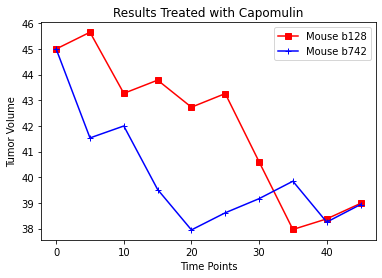

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Grab a clean copy of the data to avoid conflicts 
SC = Study_clean.copy()

# Get Values for a single mouse on the Requested Regimen
Select_Cap = SC.loc[(SC['Drug Regimen'] == 'Capomulin') & (SC['Mouse ID'] == 'b128')]
CapTumorVol = Select_Cap['Tumor Volume (mm3)']
CapTimePoint = Select_Cap['Timepoint']

# Chart first mouse on the Requested Regimen
CapTumorVolP, = plt.plot(CapTimePoint, CapTumorVol, color="red", marker="s", label="Mouse b128" )

# Get values for a second mouse  
Select_Cap = SC.loc[(SC['Drug Regimen'] == 'Capomulin') & (SC['Mouse ID'] == 'b742')]
CapTumorVol = Select_Cap['Tumor Volume (mm3)']
CapTimePoint = Select_Cap['Timepoint']

#Chart a second mouse 
CapTumorVolP1, = plt.plot(CapTimePoint, CapTumorVol, color="Blue", marker="+", label="Mouse b742")

# Clean up the chart
plt.title("Results Treated with Capomulin")
plt.ylabel('Tumor Volume')
plt.xlabel('Time Points')
plt.legend(handles=[CapTumorVolP, CapTumorVolP1], loc="best")
plt.show()

## Single Mouse on Capomulin Evaluation
#### Mouse b128 showed a tumor reduction over the course of the study period, however there were also measured time points indicating some tumor regrowth. Mouse b742 was also added to the chart to evaluate if mouse b128 might be considered typical. 

## Correlation and Regression

The correlation between both factors is 0.53


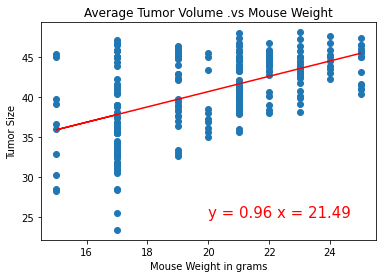

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Grab a clean copy of the data to avoid conflicts 
SC = Study_clean.copy()

# Get Values for a single mouse on the Requested Regimen
Select_Cap = SC.loc[(SC['Drug Regimen'] == 'Capomulin')]
fig, ax = plt.subplots()

# Weight vs Tumor size get weight and tumor size
weight = Select_Cap.iloc[:,4]
tumor_size = Select_Cap.iloc[:,6]

# Get Correlation
correlation = st.pearsonr(weight,tumor_size)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show scatter plot
ax.scatter(weight,tumor_size)

# Set titles for scatter plot
ax.set_xlabel('Mouse Weight in grams')
ax.set_ylabel('Tumor Size')
ax.set_title("Average Tumor Volume .vs Mouse Weight")

# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight,tumor_size) # returns a tuple of values
regress_values = weight * slope + intercept

# making a text version of our equation for display
line_eq = "y = " + str(round(slope,2)) + " x = " + str(round(intercept,2))

# draw our regression line
ax.plot(weight,regress_values,"r-")

# annotate on our figure the line equation in red
ax.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.show()

## Correlation and Linear Regression Analysis
#### The pearsonr correlation between mouse weight and tumor size is positive, meaning as mouse weight increases so do tumor weights generally. With a correlation factor of +.53 it is a positive correlation but not a strong correlation.

# Conclusion

#### We have analyzed several drug regimens for their effectiveness in shrinking tumors in mice. Our analysis has revealed two specific regimens that show greater promise than the others evaluated in the study. In our set of study data Capomulin and Ramicane have shown to produce the best results. 